In [28]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from imports import *
from helpers import *
from bert_embedder import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
if not 'available_traits' in globals():
    training_data = merge_and_prepare_training_data()
    available_traits = training_data['TO'].unique()
    emb_map = pd.read_parquet(TRAIT_ONTOLOGY_BERT_EMBEDDING_FILE)
    emb_map = emb_map.loc[available_traits]

In [34]:
to = get_trait_ontology()
to['sentence_']

3193    carbon sensitivity is a non-mineral nutrient s...
3195    alkali soil sensitivity is a alkali sensitivit...
3196    reversible male sterility is a genetically eng...
3197    calcium sensitivity is a secondary macronutrie...
3198    sulfur sensitivity is a secondary macronutrien...
3199    potassium sensitivity is a primary macronutrie...
3200    genic male sterility-photoperiod sensitive is ...
3201    magnesium sensitivity is a secondary macronutr...
3202    nitrogen sensitivity is a primary macronutrien...
3203    hydrogen sensitivity is a non-mineral nutrient...
3204    resistance to disease by mycoplasma-like organ...
3205    panicle weight is a panicle inflorescence morp...
3206    oxygen sensitivity is a oxidative stress . def...
3207    cobalt sensitivity is a other nutrient sensiti...
3208    plant morphology is a plant trait .Includes tr...
3209    boron sensitivity is a micronutrient sensitivi...
3210    seedling height is a plant height . defined as...
3212    copper

# what are all the ACTUAL TRAITS (including combinations)

In [43]:
multi_trait_data = (training_data[['Entry', 'TO']]
 .groupby('Entry')
 .agg(lambda x: tuple(sorted(list(set(x))))))
multi_trait_data

TO
Entry                                                        
A0A023INX1  (bacterial disease resistance, protist disease...
A0A059Q7B6  (bacterial disease resistance, fungal disease ...
A0A059Q7R0                    (bacterial disease resistance,)
A0A059Q7R8                       (fungal disease resistance,)
A0A059Q8L0  (bacterial disease resistance, protist disease...
A0A059Q8M2                    (bacterial disease resistance,)
A0A059Q917  (bacterial disease resistance, protist disease...
A0A060CVM9               (cell elongation trait, root weight)
A0A060CXJ6  (cardinal organ part morphology trait, cardina...
A0A060CYH3  (days to flowering trait, days to heading, day...
A0A060CYX6  (biotic stress trait, disease resistance, fung...
A0A060CZ29  (multi-tissue plant structure morphology trait...
A0A060CZ68                        (starch yield, yield trait)
A0A060D116                    (bacterial disease resistance,)
A0A060D150                    (bacterial disease resistance,)
A0A060D1B6  (inflorescence branch arrangement, inflorescen...
A0A060D1M1  (biochemical trait, carbohydrate content, meta...
A0A060D1M6  (biotic stress trait, disease resistance, fung...
A0A060D1W7  (acid detergent fiber, dietary fiber related t...
A0A060D206  (biochemical trait, biological process trait, ...
A0A060D249  (cardinal organ part morphology trait, cardina...
A0A060D2B6  (flowering time trait, photoperiod-sensitive f...
A0A060D2G0  (plant height, plant morphology trait, plant s...
A0A060D2H9  (abiotic stress trait, abscisic acid sensitivi...
A0A060D3B5  (days to heading, days to inflorescence exsert...
A0A060D3B9  (anthesis silking interval, flowering time tra...
A0A060D3C2  (cardinal organ part morphology trait, cardina...
A0A060D4H1  (plant height, plant morphology trait, plant s...
A0A060D4L7  (plant height, plant morphology trait, plant s...
A0A060D557  (spikelet number, spikelets per panicle length...
...                                                       ...
W5CX20                              (root development trait,)
W5CXB9      (abiotic stress trait, bacterial disease resis...
W5CZG6                                      (salt tolerance,)
W5D237                            (viral disease resistance,)
W5D2V6                               (leaf senescence trait,)
W5D3I0                              (root development trait,)
W5D4C8           (plant height, sterility or fertility trait)
W5D4Q6                                  (disease resistance,)
W5D6F4                                      (salt tolerance,)
W5EB84                            (metabolite content trait,)
W5EH87                            (viral disease resistance,)
W5EXP9      (flowering time trait, inflorescence developme...
W5F232                                          (leaf gloss,)
W5F2N6                                   (fruit yield trait,)
W5FC48                    (plant growth hormone sensitivity,)
W5FER5                               (enzyme activity trait,)
W5FNG8      (abiotic stress trait, sterility or fertility ...
W5FWM0      (flowering time trait, inflorescence developme...
W5FWN3                    (plant growth hormone sensitivity,)
W5FWW5                               (enzyme activity trait,)
W5GBW4                            (viral disease resistance,)
W5GZ84                                   (fruit yield trait,)
W5HDV2                            (viral disease resistance,)
W5HHR0                (leaf gloss, trichome morphology trait)
W5HUQ1                (leaf gloss, trichome morphology trait)
W5I6T7                (leaf gloss, trichome morphology trait)
W5U5X2      (inflorescence branching, inflorescence develo...
W5UB93      (plant height, plant morphology trait, plant s...
W6JQR4      (fruit growth and development trait, gibberell...
X2C029                   (seed growth and development trait,)

[25827 rows x 1 columns]

In [45]:
multi_trait_data['TO'].unique()

array([('bacterial disease resistance', 'protist disease resistance'),
       ('bacterial disease resistance', 'fungal disease resistance'),
       ('bacterial disease resistance',), ('fungal disease resistance',),
       ('cell elongation trait', 'root weight'),
       ('cardinal organ part morphology trait', 'cardinal part of a multi-tissue plant structure morphology trait', 'leaf lamina length', 'leaf lamina morphology trait', 'plant height', 'plant morphology trait', 'plant structure morphology trait', 'whole plant morphology trait', 'whole plant size'),
       ('days to flowering trait', 'days to heading', 'days to inflorescence exsertion', 'days to silk', 'flowering time trait', 'plant growth and development trait', 'plant phenological trait'),
       ('biotic stress trait', 'disease resistance', 'fungal disease resistance', 'stress trait'),
       ('multi-tissue plant structure morphology trait', 'plant morphology trait', 'plant structure morphology trait', 'seed morphology trai

In [ ]:
def claculate_mean_distance()

In [165]:
from sklearn.metrics import pairwise_distances
from tqdm import tqdm_notebook as tqdm

@mem.cache
def get_dist(traits):
    if len(traits) == 1: return 0
    x = emb_map.loc[list(traits)]
    return pairwise_distances(x, metric='cosine')

@mem.cache
def get_max_dist(traits):
    dist = get_dist(traits)
    try: return get_dist(traits).max()
    except: return dist

multi_trait_data = multi_trait_data.drop_duplicates(subset=['TO'])
multi_trait_data['max_dist'] = [get_max_dist(t) for t in tqdm(multi_trait_data['TO'].values)]
multi_trait_data = multi_trait_data.sort_values('max_dist', ascending=False)

#multi_trait_data = multi_trait_data[multi_trait_data['max_dist'] > 0]
multi_trait_data.shape

(880, 3)

In [169]:
#traits = multi_trait_data.sample(1)['TO'].values[0]
distances = pd.DataFrame(get_dist(traits), columns=traits, index=traits).sort_values(traits[0])

distances

days to heading  \
days to heading                                  7.152557e-07   
days to inflorescence exsertion                  5.546463e-02   
spikelet number                                  7.967377e-02   
inflorescence development trait                  1.174975e-01   
plant growth and development trait               1.212801e-01   
inflorescence branching                          1.248112e-01   
plant phenological trait                         1.354505e-01   
spikelets per panicle length                     1.392852e-01   
shoot system growth and development trait        1.514683e-01   
yield trait                                      1.656065e-01   
plant structure growth and development trait     1.724082e-01   
inflorescence branch arrangement                 1.770381e-01   

                                              days to inflorescence exsertion  \
days to heading                                                      0.055465   
days to inflorescence exsertion                                      0.000000   
spikelet number                                                      0.091927   
inflorescence development trait                                      0.097642   
plant growth and development trait                                   0.131243   
inflorescence branching                                              0.097179   
plant phenological trait                                             0.129456   
spikelets per panicle length                                         0.143174   
shoot system growth and development trait                            0.146078   
yield trait                                                          0.181625   
plant structure growth and development trait                         0.164113   
inflorescence branch arrangement                                     0.135662   

                                              inflorescence branch arrangement  \
days to heading                                                       0.177038   
days to inflorescence exsertion                                       0.135662   
spikelet number                                                       0.141237   
inflorescence development trait                                       0.096001   
plant growth and development trait                                    0.169993   
inflorescence branching                                               0.047569   
plant phenological trait                                              0.181019   
spikelets per panicle length                                          0.192905   
shoot system growth and development trait                             0.169373   
yield trait                                                           0.197012   
plant structure growth and development trait                          0.163530   
inflorescence branch arrangement                                      0.000000   

                                              inflorescence branching  \
days to heading                                          1.248112e-01   
days to inflorescence exsertion                          9.717941e-02   
spikelet number                                          1.059376e-01   
inflorescence development trait                          5.890262e-02   
plant growth and development trait                       1.082555e-01   
inflorescence branching                                  2.980232e-07   
plant phenological trait                                 1.172141e-01   
spikelets per panicle length                             1.719173e-01   
shoot system growth and development trait                1.251935e-01   
yield trait                                              1.491008e-01   
plant structure growth and development trait             1.298037e-01   
inflorescence branch arrangement                         4.756862e-02   

                                              inflorescence development trait  \
days to heading                                 

In [162]:
def find_top_representative_trait(traits):
    distances = pd.DataFrame(get_dist(traits), columns=traits, index=traits).sort_values(traits[0])
    dist = distances[traits[0]].values
    dist = np.array(dist.tolist() + [np.median(dist)]).reshape((len(dist)+1, 1))
    pw = pairwise_distances(dist)[-1][:-1]
    return traits[pw.argmin()]

find_top_representative_trait(traits)

'plant growth and development trait'

In [164]:
test_cases = multi_trait_data.sample(20)['TO'].values

for trait_list in tqdm(test_cases):
    print(trait_list)
    print()
    print(find_top_representative_trait(trait_list))
    print('-'*100)

('cardinal organ part morphology trait', 'cardinal part of a multi-tissue plant structure morphology trait', 'leaf lamina morphology trait', 'leaf lamina width', 'multi-tissue plant structure morphology trait', 'plant morphology trait', 'plant structure morphology trait', 'seed morphology trait', 'seed weight')

multi-tissue plant structure morphology trait
----------------------------------------------------------------------------------------------------
('cardinal organ part morphology trait', 'cardinal part of a multi-tissue plant structure morphology trait', 'leaf lamina morphology trait', 'leaf lamina width', 'multi-tissue plant structure morphology trait', 'plant morphology trait', 'plant structure morphology trait', 'seed length', 'seed morphology trait', 'seed size')

multi-tissue plant structure morphology trait
----------------------------------------------------------------------------------------------------
('biochemical trait', 'carbohydrate content', 'metabolite content

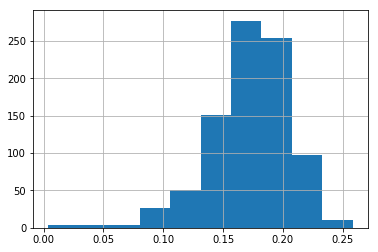

In [167]:
multi_trait_data['max_dist'].hist()

In [177]:
# samples = multi_trait_data[multi_trait_data['max_dist'] > 0.25].sample(1)['TO'].values[0]
# pd.DataFrame(get_dist(samples), columns=samples, index=samples).sort_values(samples[0])


abiotic stress trait  \
abiotic stress trait                                  8.344650e-07   
chemical stress sensitivity                           2.509201e-02   
stress trait                                          3.311020e-02   
oxidative stress                                      8.589029e-02   
plant growth and development trait                    1.355624e-01   
hydrogen peroxide content                             1.383883e-01   
inflorescence development trait                       1.424304e-01   
inflorescence branching                               1.590264e-01   
shoot system growth and development trait             1.739511e-01   
plant structure growth and development trait          1.792736e-01   
inflorescence branch arrangement                      2.274723e-01   

                                              chemical stress sensitivity  \
abiotic stress trait                                         2.509201e-02   
chemical stress sensitivity                                  1.788139e-07   
stress trait                                                 4.287577e-02   
oxidative stress                                             6.848902e-02   
plant growth and development trait                           1.256825e-01   
hydrogen peroxide content                                    1.210752e-01   
inflorescence development trait                              1.417100e-01   
inflorescence branching                                      1.496043e-01   
shoot system growth and development trait                    1.600326e-01   
plant structure growth and development trait                 1.679028e-01   
inflorescence branch arrangement                             2.220216e-01   

                                              hydrogen peroxide content  \
abiotic stress trait                                       1.383883e-01   
chemical stress sensitivity                                1.210752e-01   
stress trait                                               1.353036e-01   
oxidative stress                                           6.719244e-02   
plant growth and development trait                         1.595442e-01   
hydrogen peroxide content                                  4.768372e-07   
inflorescence development trait                            1.840768e-01   
inflorescence branching                                    1.916405e-01   
shoot system growth and development trait                  1.938424e-01   
plant structure growth and development trait               2.031802e-01   
inflorescence branch arrangement                           2.584874e-01   

                                              inflorescence branch arrangement  \
abiotic stress trait                                                  0.227472   
chemical stress sensitivity                                           0.222022   
stress trait                                                          0.236558   
oxidative stress                                                      0.247200   
plant growth and development trait                                    0.169993   
hydrogen peroxide content                                             0.258487   
inflorescence development trait                                       0.096001   
inflorescence branching                                               0.047569   
shoot system growth and development trait                             0.169373   
plant structure growth and development trait                          0.163530   
inflorescence branch arrangement                                      0.000000   

                                              inflorescence branching  \
abiotic stress trait                                     1.590264e-01   
chemical stress sensitivity                              1.496043e-01   
stress trait                                             1.573749e-01   
oxidative stress                                         1.737884e-01   
plant growth and development 

# OPERATION: How to select one trait per gene using bert?

## per each list of potential traits:
1. calculate the pairwise distance (cosine) based on bert embedding.
2. take the first column of distances.
3. calculate the median of distances.
4. pick the trait that is closer to the median.
5. use this ONE trait to represent the gene


In [188]:
print(f'Training data before trait consolidation: {training_data.shape[0]} gene-trait association')
multi_trait_data = (training_data[['Entry', 'TO']]
 .groupby('Entry')
 .agg(lambda x: tuple(sorted(list(set(x))))))
multi_trait_data

print(f'Training data after listing traits: {multi_trait_data.shape[0]} gene-trait association')

@mem.cache
def find_top_representative_trait(traits):
    if len(traits) == 1: return trait[0]
    distances = pd.DataFrame(get_dist(traits), columns=traits, index=traits).sort_values(traits[0])
    dist = distances[traits[0]].values
    dist = np.array(dist.tolist() + [np.median(dist)]).reshape((len(dist)+1, 1))
    pw = pairwise_distances(dist)[-1][:-1]
    return traits[pw.argmin()]

multi_trait_data['TO_selected'] = [find_top_representative_trait(t) for t in tqdm(multi_trait_data['TO'].values)]
multi_trait_data

Training data before trait consolidation: 81981 gene-trait association
Training data after listing traits: 25827 gene-trait association


TO  \
Entry                                                           
A0A023INX1  (bacterial disease resistance, protist disease...   
A0A059Q7B6  (bacterial disease resistance, fungal disease ...   
A0A059Q7R0                    (bacterial disease resistance,)   
A0A059Q7R8                       (fungal disease resistance,)   
A0A059Q8L0  (bacterial disease resistance, protist disease...   
A0A059Q8M2                    (bacterial disease resistance,)   
A0A059Q917  (bacterial disease resistance, protist disease...   
A0A060CVM9               (cell elongation trait, root weight)   
A0A060CXJ6  (cardinal organ part morphology trait, cardina...   
A0A060CYH3  (days to flowering trait, days to heading, day...   
A0A060CYX6  (biotic stress trait, disease resistance, fung...   
A0A060CZ29  (multi-tissue plant structure morphology trait...   
A0A060CZ68                        (starch yield, yield trait)   
A0A060D116                    (bacterial disease resistance,)   
A0A060D150                    (bacterial disease resistance,)   
A0A060D1B6  (inflorescence branch arrangement, inflorescen...   
A0A060D1M1  (biochemical trait, carbohydrate content, meta...   
A0A060D1M6  (biotic stress trait, disease resistance, fung...   
A0A060D1W7  (acid detergent fiber, dietary fiber related t...   
A0A060D206  (biochemical trait, biological process trait, ...   
A0A060D249  (cardinal organ part morphology trait, cardina...   
A0A060D2B6  (flowering time trait, photoperiod-sensitive f...   
A0A060D2G0  (plant height, plant morphology trait, plant s...   
A0A060D2H9  (abiotic stress trait, abscisic acid sensitivi...   
A0A060D3B5  (days to heading, days to inflorescence exsert...   
A0A060D3B9  (anthesis silking interval, flowering time tra...   
A0A060D3C2  (cardinal organ part morphology trait, cardina...   
A0A060D4H1  (plant height, plant morphology trait, plant s...   
A0A060D4L7  (plant height, plant morphology trait, plant s...   
A0A060D557  (spikelet number, spikelets per panicle length...   
...                                                       ...   
W5CX20                              (root development trait,)   
W5CXB9      (abiotic stress trait, bacterial disease resis...   
W5CZG6                                      (salt tolerance,)   
W5D237                            (viral disease resistance,)   
W5D2V6                               (leaf senescence trait,)   
W5D3I0                              (root development trait,)   
W5D4C8           (plant height, sterility or fertility trait)   
W5D4Q6                                  (disease resistance,)   
W5D6F4                                      (salt tolerance,)   
W5EB84                            (metabolite content trait,)   
W5EH87                            (viral disease resistance,)   
W5EXP9      (flowering time trait, inflorescence developme...   
W5F232                                          (leaf gloss,)   
W5F2N6                                   (fruit yield trait,)   
W5FC48                    (plant growth hormone sensitivity,)   
W5FER5                               (enzyme activity trait,)   
W5FNG8      (abiotic stress trait, sterility or fertility ...   
W5FWM0      (flowering time trait, inflorescence developme...   
W5FWN3                    (plant growth hormone sensitivity,)   
W5FWW5                               (enzyme activity trait,)   
W5GBW4                            (viral disease resistance,)   
W5GZ84                                   (fruit yield trait,)   
W5HDV2                            (viral disease resistance,)   
W5HHR0                (leaf gloss, trichome morphology trait)   
W5HUQ1                (leaf gloss, trichome morphology trait)   
W5I6T7                (leaf gloss, trichome morphology trait)   
W5U5X2      (inflorescence branching, inflorescence develo...   
W5UB93      (plant height, plant morphology trait, plant s...   
W6JQR4      (fruit growth and development trait, gibberell...   
X2C029                   (see

In [213]:
consolidated_data = (multi_trait_data
                     .reset_index()[['Entry', 'TO_selected']]
                     .rename(columns={'TO_selected' : 'TO'})
                     .merge(training_data[['Entry', 'type']], how='left', on='Entry')
                     .drop_duplicates(subset=['Entry', 'TO'])
                    )
consolidated_data.shape

(25827, 3)

In [217]:
consolidated_data.groupby('TO').count()

Entry   type
TO                                                              
abiotic stress trait                                10622  10622
abscisic acid content                                  75     75
abscisic acid sensitivity                             118    118
anthocyanin content                                    88     88
auxin sensitivity                                     322    322
bacterial disease resistance                          728    728
biochemical trait                                     255    255
biological process trait                              174    174
biotic stress trait                                   167    167
brassinosteroid sensitivity                            26     26
brittle culm                                           19     19
carbohydrate content                                   54     54
cardinal organ part morphology trait                   30     30
cardinal part of a multi-tissue plant structure...      1      1
carotene content                                        5      5
carotenoid content                                     11     11
cell cycle trait                                      232    232
cell elongation trait                                  47     47
chlorophyll content                                   253    253
cold tolerance                                        339    339
collective plant structure morphology trait            63     63
cooking quality trait                                  17     17
copper concentration                                   47     47
copper content trait                                    4      4
cyclic carotene content                                10     10
days to flowering trait                                 1      1
days to heading                                         5      5
days to inflorescence exsertion                       366    366
days to silk                                          157    157
days to tassel                                         10     10
...                                                   ...    ...
plant structure growth and development trait           48     48
plant structure morphology trait                     1042   1042
plant vigor trait                                      23     23
plastid development trait                              46     46
potassium concentration                                10     10
primary branching of inflorescence                      4      4
protein content                                         3      3
protist disease resistance                            336    336
radiation response trait                               60     60
relative growth rate                                    1      1
relative root dry weight                               39     39
root development trait                                  7      7
root dry weight                                         3      3
root fresh weight                                      10     10
root hair density                                      98     98
root morphology trait                                  46     46
root volume                                             7      7
rooting depth                                          20     20
seed coat color                                         2      2
seed length                                            12     12
seed morphology trait                                  10     10
seed yield trait                                       43     43
seedling vigor                                          3      3
shoot apical meristem development                       9      9
shoot dry weight                                       11     11
shoot fresh weight                                     45     45
shoot system growth and development trait               1      1
spikelet number                                        91     91
spikelets per panicle length                          590    590
starch yield          

# balancing the dataset

# different sampling startegy ... 
make sure all traits have at least 1000 examples 

In [243]:
gb = consolidated_data[['Entry', 'TO']].groupby('TO').count()
gb = gb[gb['Entry'] < 1000]
upsampling_dict = dict(zip(gb.index, [1000]*len(gb)))


ros = RandomOverSampler(upsampling_dict, random_state=5)
x, y = consolidated_data[['Entry', 'TO']].T.values
x = x.reshape(-1, 1)
X_resampled, y_resampled = ros.fit_resample(x, y)
consolidated_data_balanced = pd.DataFrame({'Entry' : X_resampled.ravel(), 'TO' : y_resampled})
consolidated_data_balanced
print(consolidated_data_balanced.shape)
consolidated_data_balanced.groupby('TO').count()

(164664, 2)


Entry
TO                                                       
abiotic stress trait                                10622
abscisic acid content                                1000
abscisic acid sensitivity                            1000
anthocyanin content                                  1000
auxin sensitivity                                    1000
bacterial disease resistance                         1000
biochemical trait                                    1000
biological process trait                             1000
biotic stress trait                                  1000
brassinosteroid sensitivity                          1000
brittle culm                                         1000
carbohydrate content                                 1000
cardinal organ part morphology trait                 1000
cardinal part of a multi-tissue plant structure...   1000
carotene content                                     1000
carotenoid content                                   1000
cell cycle trait                                     1000
cell elongation trait                                1000
chlorophyll content                                  1000
cold tolerance                                       1000
collective plant structure morphology trait          1000
cooking quality trait                                1000
copper concentration                                 1000
copper content trait                                 1000
cyclic carotene content                              1000
days to flowering trait                              1000
days to heading                                      1000
days to inflorescence exsertion                      1000
days to silk                                         1000
days to tassel                                       1000
...                                                   ...
plant structure growth and development trait         1000
plant structure morphology trait                     1042
plant vigor trait                                    1000
plastid development trait                            1000
potassium concentration                              1000
primary branching of inflorescence                   1000
protein content                                      1000
protist disease resistance                           1000
radiation response trait                             1000
relative growth rate                                 1000
relative root dry weight                             1000
root development trait                               1000
root dry weight                                      1000
root fresh weight                                    1000
root hair density                                    1000
root morphology trait                                1000
root volume                                          1000
rooting depth                                        1000
seed coat color                                      1000
seed length                                          1000
seed morphology trait                                1000
seed yield trait                                     1000
seedling vigor                                       1000
shoot apical meristem development                    1000
shoot dry weight                                     1000
shoot fresh weight                                   1000
shoot system growth and development trait            1000
spikelet number                                      1000
spikelets per panicle length                         1000
starch yield                                         1000

[155 rows x 1 columns]

# Now prepare training data: remove genes without gene_data, and balance!

In [253]:
gene_data = get_gene_data()
consolidated_data = consolidated_data[consolidated_data['Entry'].isin(gene_data.index)]
consolidated_data.groupby('type').count()

Entry     TO
type                     
annotated      385    385
association   9250   9250
orthologs    11138  11138

# select validation set

In [278]:
annotated = consolidated_data[consolidated_data['type'] == 'annotated']
gb = annotated.groupby('TO').count()
gb = gb[gb['Entry'] > 1].reset_index()[['TO', 'Entry']]
gb['to_sample'] = [min([int(round(v / 3)),10]) for v in gb['Entry'].values]
samples = [(consolidated_data[consolidated_data['TO'] == to]
           .sample(to_sample))
          for to, to_sample in gb[['TO', 'to_sample']].values]
samples = pd.concat(samples)
samples

Entry                                  TO         type
20310  A0A1U8MFG3                abiotic stress trait    orthologs
29313  A0A3B6NUF5                abiotic stress trait    orthologs
17613  A0A1S3AX03                abiotic stress trait    orthologs
685    A0A0A0KIE1                abiotic stress trait    orthologs
27269  A0A368UHW8                abiotic stress trait    orthologs
1073   A0A0A0LPY7                abiotic stress trait    orthologs
18030  A0A1S3C3N5                abiotic stress trait    orthologs
17630  A0A1S3AZ58                abiotic stress trait    orthologs
17213  A0A1I9LMP0                abiotic stress trait    orthologs
51557      M1BT95                abiotic stress trait    orthologs
47494      K7M1M9           abscisic acid sensitivity    orthologs
34808      A3B9A0                   auxin sensitivity    orthologs
17973  A0A1S3BW19        bacterial disease resistance    orthologs
19858  A0A1U8L6W9        bacterial disease resistance    orthologs
81299      Q9LIS2        bacterial disease resistance    orthologs
20910  A0A1U8P5L5        bacterial disease resistance    orthologs
80089      Q8W2X5        bacterial disease resistance    orthologs
57326      Q10PL9                   biochemical trait  association
39581      B6T629                 biotic stress trait  association
46138      I1JXF8                    cell cycle trait    orthologs
34134  A0A3Q7I9M4                    cell cycle trait    orthologs
54391      Q10A81                 chlorophyll content  association
46243      I1KAG5                 chlorophyll content    orthologs
58572      Q10RN0                      cold tolerance  association
68671      Q53LD5                copper concentration  association
66289      Q2R3B4                  disease resistance  association
13243  A0A1D6LUU2                   drought tolerance    orthologs
44134      C4J431               enzyme activity trait  association
73966      Q6ZHH4           far red light sensitivity    orthologs
17926  A0A1S3BSW8            flower development trait    orthologs
34178  A0A3Q7IL70                flowering time trait    orthologs
50890      M0ZSN0                flowering time trait    orthologs
21003  A0A1U8PFE1  fruit growth and development trait    orthologs
72986      Q6F4F5                         grain shape    annotated
53218      Q0DJ33                          grain size    annotated
16843  A0A1D6Q984   leaf growth and development trait    orthologs
27535  A0A3B5ZVW6               leaf morphology trait    orthologs
8029   A0A1D6HH84  plant growth and development trait  association
11687  A0A1D6KJL7  plant growth and development trait  association
30088  A0A3L6D6I9                        plant height  association
39616      B6T6M5                        plant height  association
27371  A0A3B5Y3T6                   root hair density    orthologs